In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import operator      
import random
from environment import Agent, Environment
from planner import RoutePlanner
from simulator import Simulator
import math

class LearningAgent(Agent):
    """An agent that learns to drive in the smartcab world."""
    success=0
    # Keeping track of rewards and penalties for each trial
    rewards=[]
    penalties=[]			
    def __init__(self, env):
        super(LearningAgent, self).__init__(env)  
        self.color = 'red'  # override color
        self.planner = RoutePlanner(self.env, self)  # simple route planner to get next_waypoint
	self.rewards=0
	self.penalties=0
        # TODO: Initialize any additional variables here
        self.Q = {}  # QTable
	#VARIABLES that wil be used for Q Value update        
	self.reward_old = None
        self.action_old = None
        self.state_old = None
        self.counter = 0 #counts steps in the trial
        self.action_argmax=None
        ##Initial conditions (Q0)    
        self.Q_0 = 0  # Q values at the begining
	#Different parameters
	self.epsilon=0
        self.gamma = 0 #Discount factor
        self.actions = Environment.valid_actions
        self.alpha = 1 #Learning rate counts
        self.trial_number=0 # counts the number of the trial
	


	self.penalty=0
	self.reward=0
    def reset(self, destination=None):
	self.epsilon =0
        LearningAgent.rewards.append((self.reward/(self.counter+1)))
	LearningAgent.penalties.append((self.penalty/(self.counter+1)))
	self.penalty=0
	self.reward=0	
	self.planner.route_to(destination)
        # TODO: Prepare for a new trip; reset any variables here, if required
	self.counter = 0
        self.trial_number=self.trial_number+1
    def update(self, t):

	
        # Gather inputs for current state
        self.epsilon  =(self.counter/(self.counter+1.0))  
	self.next_waypoint = self.planner.next_waypoint()  # from route planner, also displayed by simulator
        inputs = self.env.sense(self)
        deadline = self.env.get_deadline(self)
        #Define the current state based on inputs sensed
     	self.state = (inputs['light'], inputs['oncoming'], inputs['left'],self.next_waypoint)




 # TODO: Select action according to your policy

        Q = self.Q 

        if self.state in self.Q :  # previously been in this state
                # small epsilon= exlporation    
           	if self.epsilon<random.random():
					action = random.choice(self.actions)
					#print ("Exploratory action      " +str(action))
	        else:
                    states=max(self.Q[self.state].iteritems(), key=operator.itemgetter(1))
                    self.action_argmax=states[0]
                    #print "Exploiting action     " +str(self.action_argmax)
                    action = self.action_argmax
				                    

        else :  # New state. choose random action
			Q.update({self.state : {None : self.Q_0, 'forward' : self.Q_0, 'left' : self.Q_0, 'right' : self.Q_0}}) 
			action = random.choice([None, 'forward', 'left', 'right'])  


# Execute action and get reward
        reward = self.env.act(self, action)  #what was the reward for the chosen action?
	
	if reward>0:
		self.reward+=reward
	else:
		self.penalty+=reward
	
    
# TODO: Learn policy based on state, action, reward
        if self.counter > 0 :  #make sure it is not the first step in a trial.
            Q[self.state_old][self.action_old]= Q[self.state_old][self.action_old] + (self.alpha * (self.reward_old + (self.gamma * (max(Q[self.state].values()))) -  Q[self.state_old][self.action_old]))
            
	   
#Store actions, state and reward as previous_ for use in the next cycle
        self.state_old = self.state
        self.action_old = action
        self.reward_old = reward
        self.counter += 1
	# count and write to files success/failures
	if self.env.done == True:
		LearningAgent.success=LearningAgent.success+1
                #print '........................................................Success' 	    
		file.write('  ({} {}),  '.format("   Succcesful in  :  ",str(self.counter)))
	elif deadline==0:
		file.write('  ({} {}),  '.format("   Failed in  :  ",str(self.counter)))
               # print '........................................................Failed' 	

    			
	
def run():
    """Run the agent for a finite number of trials."""
    # Set up environment and agent
    e = Environment()  # create environment (also adds some dummy traffic)
    a = e.create_agent(LearningAgent)  # create agent
    e.set_primary_agent(a, enforce_deadline=True)  # set agent to track

    # Now simulate it
    sim = Simulator(e, update_delay=.0000000001 )  # reduce update_delay to speed up simulation
    sim.run(n_trials=100)  # press Esc or close pygame window to quit

#print "Counter is  "+self.counter
   
if __name__ == '__main__':
    file=open('counts.txt','w')

    run()
    print " LearningAgent.success                                       "+str(LearningAgent.success)    
    #print LearningAgent.rewards
    #print LearningAgent.penalties
	


    print " Number of Success out of 100 trials                                  "+str(LearningAgent.success)    
    
	



Simulator.__init__(): Error initializing GUI objects; display disabled.
error: Couldn't open images/car-magenta.png
Simulator.run(): Trial 0
Simulator.run(): Trial 1
Simulator.run(): Trial 2
Environment.step(): Primary agent ran out of time! Trial aborted.
Simulator.run(): Trial 3
Simulator.run(): Trial 4
Simulator.run(): Trial 5
Simulator.run(): Trial 6
Simulator.run(): Trial 7
Simulator.run(): Trial 8
Simulator.run(): Trial 9
Simulator.run(): Trial 10
Simulator.run(): Trial 11
Simulator.run(): Trial 12
Simulator.run(): Trial 13
Simulator.run(): Trial 14
Simulator.run(): Trial 15
Simulator.run(): Trial 16
Simulator.run(): Trial 17
Simulator.run(): Trial 18
Simulator.run(): Trial 19
Simulator.run(): Trial 20
Simulator.run(): Trial 21
Environment.step(): Primary agent ran out of time! Trial aborted.
Simulator.run(): Trial 22
Simulator.run(): Trial 23
Simulator.run(): Trial 24
Simulator.run(): Trial 25
Simulator.run(): Trial 26
Simulator.run(): Trial 27
Simulator.run(): Trial 28
Simulato

### Number of successes out of 100 trials:

In [80]:
print " Number of Success out of 100 trials                                  "+str(LearningAgent.success)    

 Number of Success out of 100 trials                                  98


###  Postitve Rewards vs Trial

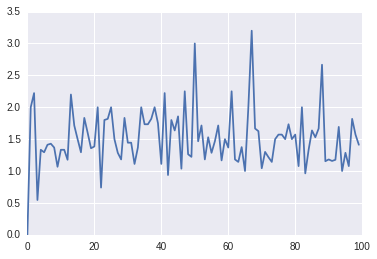

In [81]:
# positive rewards normalized by number of steps in the trial
%matplotlib inline
plt.plot(LearningAgent.rewards)

### Penalties vs Trial

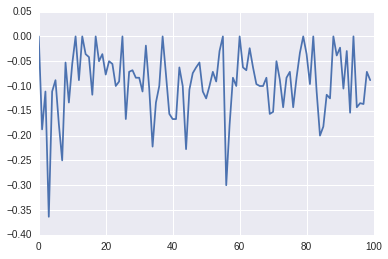

In [82]:
plt.plot(LearningAgent.penalties)

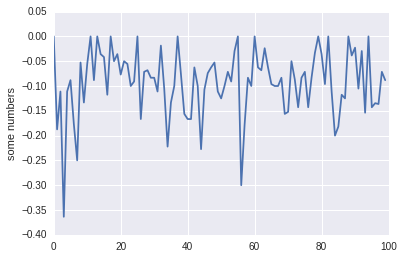

In [109]:
plt.ylabel('some numbers')

plt.plot(LearningAgent.penalties)

In [87]:
import numpy as np
np.array(LearningAgent.penalties[90:99]).mean()

-0.088501453826531226

In [93]:
len(list(range(1,100)))

99

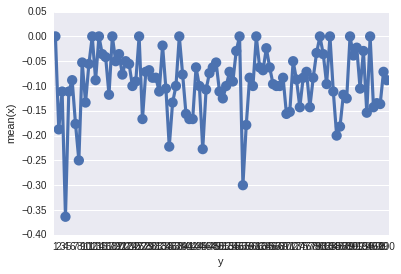

In [108]:
import pandas as pd
df = pd.DataFrame()
df['x'] =LearningAgent.penalties
df['y'] =list(range(1,101))

sns.pointplot('y','x',data=df,fit_reg=False,size=36)


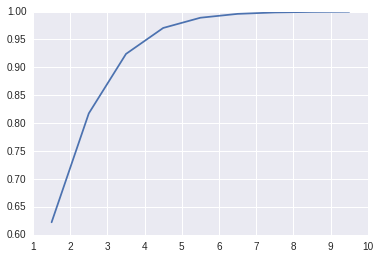

In [133]:
plt.plot(x,y)